<a href="https://colab.research.google.com/github/Niranjj875/Archery2/blob/main/PORJECT_115.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files 
data = files.upload()

Saving logsitic project.csv to logsitic project.csv


In [2]:
import pandas as pd
import plotly.express as px
df = pd.read_csv("logsitic project.csv") 
Velocity = df["Velocity"].tolist() 
Escaped = df["Escaped"].tolist() 
fig = px.scatter(x=Velocity, y=Escaped) 
fig.show()

In [3]:
import numpy as np 
velocity_array = np.array(Velocity) 
escaped_array = np.array(Escaped) 
#Slope and intercept using pre-built function of Numpy 
m, c = np.polyfit(velocity_array, escaped_array, 1) 
y = [] 
for x in velocity_array: 
  y_value = m*x + c 
  y.append(y_value) 
#plotting the graph 
fig = px.scatter(x=velocity_array, y=escaped_array) 
fig.update_layout(shapes=[ dict( type= 'line', y0= min(y), y1= max(y), x0= min(velocity_array), x1= max(velocity_array) ) ]) 
fig.show()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



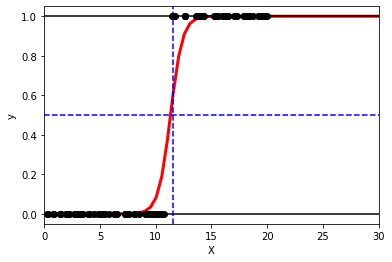

In [4]:
import matplotlib.pyplot as plt 
from sklearn.linear_model import LogisticRegression 
X = np.reshape(Velocity, (len(Velocity), 1)) 
Y = np.reshape(Escaped, (len(Escaped), 1)) 
lr = LogisticRegression() 
lr.fit(X, Y) 
plt.figure() 
plt.scatter(X.ravel(), Y, color='black', zorder=20) 
def model(x): 
  return 1 / (1 + np.exp(-x)) 
#Using the line formula 
X_test = np.linspace(0, 100, 200) 
chances = model(X_test * lr.coef_ + lr.intercept_).ravel() 
plt.plot(X_test, chances, color='red', linewidth=3) 
plt.axhline(y=0, color='k', linestyle='-') 
plt.axhline(y=1, color='k', linestyle='-') 
plt.axhline(y=0.5, color='b', linestyle='--') 
# do hit and trial by changing the value of 
X_test 
plt.axvline(x=X_test[23], color='b', linestyle='--') 
plt.ylabel('y') 
plt.xlabel('X') 
plt.xlim(0, 30) 
plt.show()

In [6]:
velocity = float(input("Enter the velocity:- ")) 
escape = model(velocity * lr.coef_ + lr.intercept_).ravel()[0] 
if escape <= 0.01: 
  print("The object will not escape the orbit") 
elif escape >= 1: 
  print("The object will escape the orbit") 
elif escape < 0.5: 
  print("The object might not escape the orbit") 
else: 
  print("The object might escape the orbit")

Enter the velocity:- 9999
The object will escape the orbit
